In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
class Layer:
    def __init__(self, n_input, n_neuron):

        self.weights = np.random.rand(n_input, n_neuron)
        self.bias = np.ones(n_neuron)

    def Net_input(self, x):
        self.net_input = np.dot(x, self.weights) + self.bias
        return self.net_input

    def activation(self, x):
        self.output = 1 / (1 + np.exp(-self.Net_input(x)))
        return self.output


    def activation_drv(self, s):
        return s - s**2

In [5]:
class MultilayerPerceptron:

    def __init__(self, n_layer, n_neuron, n_input, n_output):

        self.layers = []

        self.layers.append(Layer(n_input, n_neuron))
        [self.layers.append(Layer(n_neuron, n_neuron)) for i in range(1, n_layer-1)]
        self.layers.append(Layer(n_neuron, n_output))

    def feed_forward(self, x):

        for layer in self.layers:
            x = layer.activation(x)

        return x

    def back_propagation(self, x, y, l_rate, momentum):
      # Compute the forward pass and get the output of the neural network
      o_i = self.feed_forward(x)

      # Start the backward pass (backpropagation) through the layers in reversed order
      for i in reversed(range(len(self.layers))):
          layer = self.layers[i]
          s_i = layer

          # Calculate the error signals (deltas) for the hidden layers
          # For non-output layers, delta is the dot product of:
          #   - The derivative of the activation function with respect to the layer's output
          #   - The dot product of the next layer's weights and its delta (error signal)
          if layer != self.layers[-1]:
              layer.delta = np.dot(layer.activation_drv(layer.output), np.dot(self.layers[i+1].weights, self.layers[i+1].delta))
          # For the output layer, compute the delta directly using the error signal (y - o_i)
          else:
              layer.error = y - o_i
              layer.delta = layer.error * layer.activation_drv(o_i)

      # Update the weights for each layer using the computed deltas and the learning rate (l_rate)
      for i, layer in enumerate(self.layers):
          layer = self.layers[i]
          output_i = np.atleast_2d(x if i == 0 else self.layers[i - 1].output)

          # Update the weights using the delta, input, learning rate, and momentum (if applicable)
          # The new weight is computed as follows:
          #   - The delta is the gradient of the loss with respect to the weights.
          #   - The gradient is scaled by the learning rate (l_rate).
          #   - The previous weights are adjusted with the momentum term (layer.weights * momentum).
          #   - The updated weights are the sum of the scaled gradient and the momentum-adjusted weights.
          #   - This step aims to find the direction of steepest descent to minimize the loss function.
          layer.weights = layer.delta * output_i.T * l_rate + (layer.weights * momentum)


    def train(self, x, y, l_rate, momentum, n_iter):

        costs =[]

        for i in range(n_iter):
            for xi, yi in zip(x, y):
                self.back_propagation(xi, yi, l_rate, momentum)
            cost = np.sum((y-self.feed_forward(x))**2) / 2.0
            costs.append(cost)

        return costs

    def predict(self, x):
        outputs = (self.feed_forward(x)).tolist()
        print(outputs)

        return outputs.index(max(outputs))

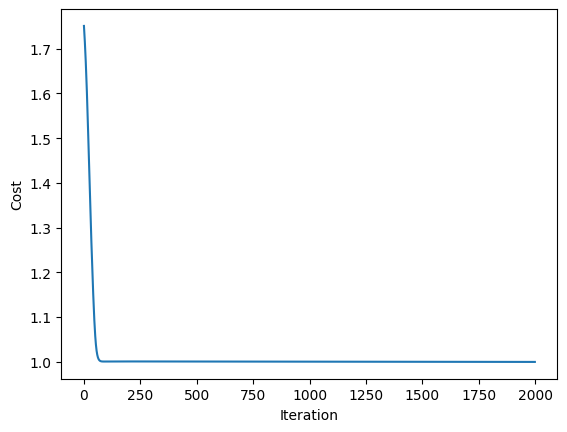

In [6]:
x = np.array([[0, 1], [1, 0], [1, 1], [0, 0]])
y = np.array([[1], [1], [0], [0]])

xorSet = MultilayerPerceptron(3, 4, 2, 2)

costs = xorSet.train(x, y, 0.1, 1, 2000)
plt.plot(costs)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.show()


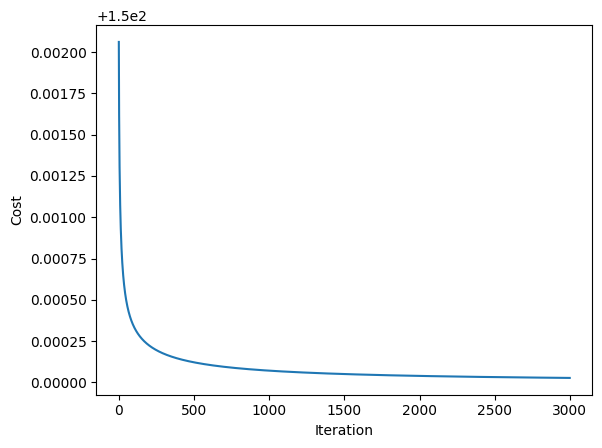

In [5]:
from mlxtend.data import iris_data
x, y = iris_data()
y = y.reshape((150,1))

irisSet = MultilayerPerceptron(4, 12, 4, 3)

costs = irisSet.train(x, y, 0.3, 1, 3000)
plt.plot(costs)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.show()